## 3.18 Activity and discussion: Sampling and hypothesis tests

Suppose a race is taking place with five horses. Nothing is known about them beforehand and betting is opened as to who will win. Suppose that 50 people place bets. 

The betting company want to know if any cheating is taking place – that is, if more people correctly guess the winner and make money than purely due to chance.

What is the null hypothesis?

Find the p-value if 12 people win money – what does this mean for the null hypothesis (using alpha = 0.05)?

> given:
> - 50 bets
> - 5 horses
> - 12 win
> - $\alpha = 0.05$

> wanted: 
> 1. $N_0$
> 2. $p-value$

### Solution:

1. The null hypothesis is that the number of people winning (betting on the winning horse) is random. In other words, every horse has an equal chance of winning, $N_0 = 1/5 = 0.2$. Thus, we have a binomial distribution with n=50 and p=0.2.
2. Calculating the p value can be done with scipy.stats.binom

In [6]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

In [7]:
help(binom)

Help on binom_gen in module scipy.stats._discrete_distns:

<scipy.stats._discrete_distns.binom_gen object>
    A binomial discrete random variable.

    As an instance of the `rv_discrete` class, `binom` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.

    Methods
    -------
    rvs(n, p, loc=0, size=1, random_state=None)
        Random variates.
    pmf(k, n, p, loc=0)
        Probability mass function.
    logpmf(k, n, p, loc=0)
        Log of the probability mass function.
    cdf(k, n, p, loc=0)
        Cumulative distribution function.
    logcdf(k, n, p, loc=0)
        Log of the cumulative distribution function.
    sf(k, n, p, loc=0)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(k, n, p, loc=0)
        Log of the survival function.
    ppf(q, n, p, loc=0)
        Percent point function (inverse of `

In [8]:
# the number of successes
x = 12

# the size
n = 50

# the probability of success for each trail
p = 0.2 

# for 12
1 - binom.cdf(k=x-1, n=n, p=p)

0.2893323950118305

0.29 > 0.05, so we cannot reject the null hypothesis. 

In other words, the fact that 12 won is explained by chance alone.

In [9]:
# use ppf to get the quantile in which n trails and p probability is explained by chance
binom.ppf(0.05, n=n, p=p), binom.ppf(0.95, n=n, p=p)

(6.0, 15.0)

In [19]:
# or freeze the distribution as random variable
rv = binom(n, p)
rv.ppf(0.95)

15.0

Note:

- Use `binom.pmf(k=x, n=n, p=p)` to calculate the probability of exactly 12 successes 
- Use `binom.cdf(k=x, n=n, p=p)` for the *cumulative* distribution function, ie 11 and more.

rv ~ random variable
binom.rvs ~ creates random points (useful for plotting)

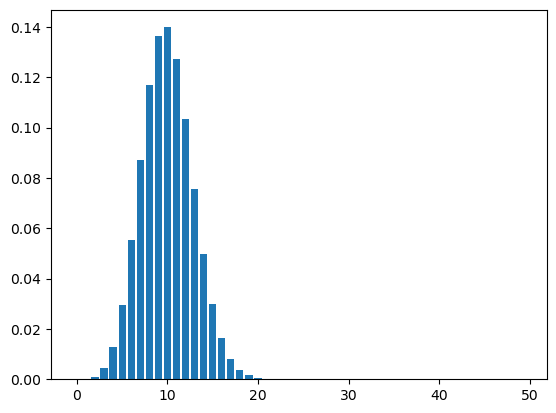

In [20]:
# to visualise the distribution:
# 1. create a range 
# 2. calculate probability mass for each point in the range
z = np.arange(0,n) 
plt.bar(z, binom.pmf(z,n,p))
plt.show()

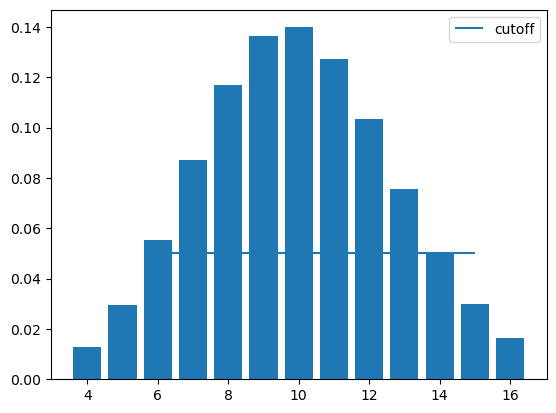

In [34]:
# alternatively, create the range with percentage point functions
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
plt.bar(x, binom.pmf(x, n, p))
plt.hlines(0.05, binom.ppf(0.05, n, p), binom.ppf(0.95, n, p),label='cutoff')
plt.legend()
plt.show()